### [PCCP 기출문제] 3번 / [아날로그 시계](https://school.programmers.co.kr/learn/courses/30/lessons/250135)
- 아날로그 시계 다 부셔버리고 싶다...

In [176]:
def solution(h1, m1, s1, h2, m2, s2):
    hour_degree = lambda x: (x / 3600 % 12) * 30
    min_degree = lambda x: (x / 60 % 60) * 6
    sec_degree = lambda x: (x % 60) * 6
    
    from_sec = h1*3600 + m1*60 + s1
    to_sec = h2*3600 + m2*60 + s2
    
    answer = 0
    cur_state = [False,False]
    for t in range(from_sec, to_sec+1):
        h, m, s = hour_degree(t), min_degree(t), sec_degree(t)
        h = h if h != 0 else 360
        m = m if m != 0 else 360
        s = s if s != 0 else 360
        prev_state = cur_state.copy()
        if s >= h and not prev_state[0]:
            cur_state[0] = True
        else :
            cur_state[0] = False
            
        if s >= m and not prev_state[1]:
            cur_state[1] = True
        else :
            cur_state[1] = False

        if h == m == s:
            answer += 1
        else :
            answer += sum(cur_state)
        
        # if t == from_sec:
        #     if h==m==s:
        #         print(t, cur_state, prev_state)
        #         answer += 1
        #     continue
        # if 1 in cur_state  and cur_state != prev_state:
        #     # print(i, cur_state, prev_state)
        #     if h == m:
        #         answer += 1
        #     else :
        #         answer += sum(cur_state) - sum(prev_state)

    return answer


In [ ]:
def solution(h1, m1, s1, h2, m2, s2):
    
    start = h1*3600+m1*60+s1
    end   = h2*3600+m2*60+s2
    
    # 분침과 초침이 겹치는 횟수 count
    answer  = int(end/3600*59)
    answer -= start//(3600/59)
    
    # 시침과 초침이 겹치는 횟수 count
    answer += end//(360*120/719)
    answer -= start//(360*120/719)
    
    # 예외처리 1 : 정오 포함된 경우
    if start<=12*60*60<=end:
        answer -= 1
    # 예외처리 2 : 시작시간이 자정or정오
    if start==0 or start==12*60*60:
        answer += 1

    return answer

In [ ]:
def solution(h1, m1, s1, h2, m2, s2):
    
    start = h1*3600+m1*60+s1
    end   = h2*3600+m2*60+s2
    
    # 분침과 초침이 겹치는 횟수 count
    answer  = int(end/3600*59) - start//(3600/59)
    
    # 시침과 초침이 겹치는 횟수 count
    answer += end//(360*120/719) - start//(360*120/719)
    
    # 예외처리 1 : 정오 포함된 경우
    if start <= 12*60*60 <= end:
        answer -= 1
    # 예외처리 2 : 시작시간이 자정or정오
    if start in [0, 12*60*60]:
        answer += 1

    return answer

In [177]:
h1, m1 , s1, h2, m2, s2 = 1,5,5,1,5,6
solution(h1, m1, s1, h2, m2, s2)

2

In [178]:
h1, m1 , s1, h2, m2, s2 = 0,0,0,23,59,59
solution(h1, m1, s1, h2, m2, s2)

44638

### [과제 진행하기](https://school.programmers.co.kr/learn/courses/30/lessons/176962)

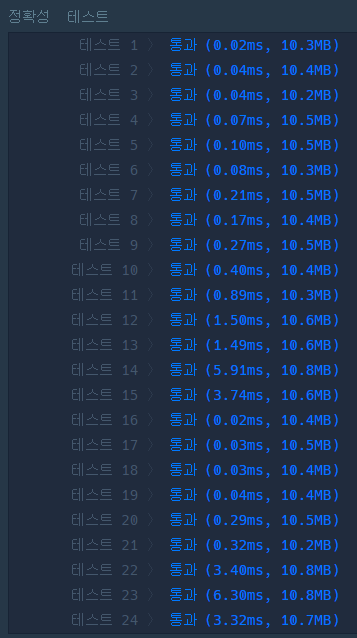

In [ ]:
from heapq import heappush, heappop

# HH:MM => Minute
def time2min(value):
    tmp = value.split(':')
    return int(tmp[0])*60 + int(tmp[1])

def solution(plans):
    answer = []
    wait_queue = []
    cplans = []

    for i in range(len(plans)):
        pn, st, lt = plans[i]
        st = time2min(st)
        lt = int(lt)

        heappush(cplans, (st, lt, pn))

    # 최소 힙
    while len(cplans) >= 2:
        st, lt, pn = heappop(cplans)
        nst, nlt, npn = heappop(cplans)

        # 종료 시간이 다음 실행시간보다 작/같 일 때
        if st + lt <= nst:
            answer.append(pn)
            waste_time = nst - (st + lt)

            # 시간 남으면 나머지 처리
            while waste_time and wait_queue:
                rst, rlt, rpn = heappop(wait_queue)

                if rlt <= waste_time:
                    answer.append(rpn)
                    waste_time -= rlt
                else:
                    heappush(wait_queue, (rst, (rlt-waste_time), rpn))
                    waste_time = 0

        # 종료 시간이 다음 실행시간보다 클 때
        else:
            heappush(wait_queue, (-st, lt-(nst-st), pn))

        heappush(cplans, (nst, nlt, npn))

    last = heappop(cplans)
    answer.append(last[2])

    while wait_queue:
        remain = heappop(wait_queue)
        answer.append(remain[2])

    return answer

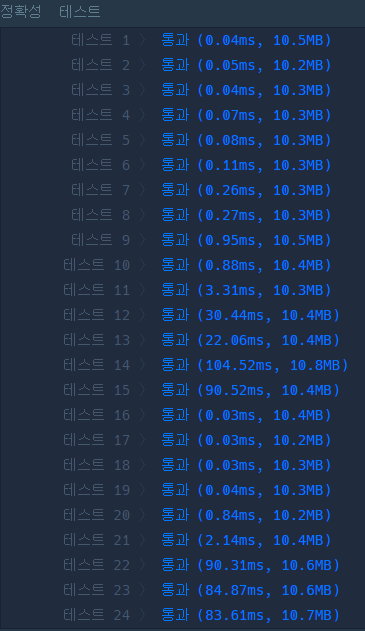

In [186]:
def solution(plans):
    plans = sorted(map(lambda x: [x[0], int(x[1][:2]) * 60 + int(x[1][3:]), int(x[2])], plans), key=lambda x: -x[1])
    lst = []
    while plans:
        x = plans.pop()
        for i, v in enumerate(lst):
            if v[0] > x[1]:
                lst[i][0] += x[2]
        lst.append([x[1] + x[2], x[0]])
    lst.sort()
    print(lst)

    return list(map(lambda x: x[1], lst))

In [204]:
def solution(plans):
    plans = sorted(map(lambda x : [int(x[1][:2])*60+int(x[1][3:]), int(x[2]), x[0]], plans), key=lambda x: -x[0])
    completed = []
    while plans:
        start, duration, name = plans.pop()
        for i, (finish_time, _) in enumerate(completed):
            if finish_time > start:
                completed[i][0] += duration
        completed.append([start+duration, name])
        
    return [x[1] for x in sorted(completed, key=lambda x : x[0])]
            

In [205]:
plans =[["a", "09:00", "30"], ["b", "09:20", "10"], ["c", "09:40", "10"]]
solution(plans)

['b', 'a', 'c']

In [206]:
plans = [["korean", "11:40", "30"], ["english", "12:10", "20"], ["math", "12:30", "40"]]
solution(plans)

['korean', 'english', 'math']

In [207]:
plans = [["aaa", "12:00", "20"], ["bbb", "12:10", "30"], ["ccc", "12:40", "10"]]
solution(plans)

['bbb', 'ccc', 'aaa']

In [208]:
plans = [["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]
solution(plans)

['science', 'history', 'computer', 'music']

### [124 나라의 숫자](https://school.programmers.co.kr/learn/courses/30/lessons/12899)

- 문자열을 이용해 3진법화하고 키맵핑

In [2]:
def decimal_to_ternary(num):
    if num == 0:
        return '0'
    ternary = ''
    while num > 0:
        remainder = num % 3
        ternary = str(remainder) + ternary
        num = num // 3
    return ternary

# 예제 실행
number = 10  # 여기에 변환하고 싶은 10진수를 입력하세요
ternary_representation = decimal_to_ternary(number)
print(f"The decimal number {number} in ternary is: {ternary_representation}")


The decimal number 10 in ternary is: 101


In [8]:
for i in range(10):
    ternary_representation = decimal_to_ternary(i)
    print(f"The decimal number {i} in ternary is: {ternary_representation}")

The decimal number 0 in ternary is: 0
The decimal number 1 in ternary is: 1
The decimal number 2 in ternary is: 2
The decimal number 3 in ternary is: 10
The decimal number 4 in ternary is: 11
The decimal number 5 in ternary is: 12
The decimal number 6 in ternary is: 20
The decimal number 7 in ternary is: 21
The decimal number 8 in ternary is: 22
The decimal number 9 in ternary is: 100


In [9]:
def solution(n):
    ternary = ''
    while n > 0:
        remainder = (n-1) % 3
        ternary = str(remainder) + ternary
        n = (n-1) // 3
    
    code = '124'
    answer = ''
    for t in ternary:
        answer += code[int(t)]       
        
    return answer

In [10]:
solution(1)

'1'

### [호텔 대실](https://school.programmers.co.kr/learn/courses/30/lessons/155651)

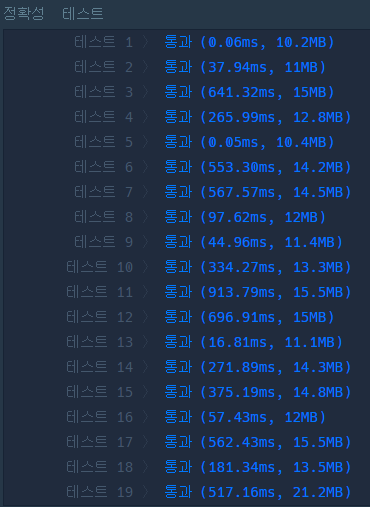

In [24]:
def solution(book_time):
    book_time = sorted(book_time, key=lambda x : x[0])
    empty_rooms = [[0]*24*60]
    for start, end in book_time:
        book = False
        start = int(start[:2])*60+int(start[3:])
        end = int(end[:2])*60+int(end[3:])
        for idx, empty_room in enumerate(empty_rooms):
            if sum(empty_room[start:end]) == 0:
                empty_rooms[idx][start:end+10] = [1]*(end-start+10)
                book = True
                break
        if not book:
            empty_room = [0]*24*60
            empty_room[start:end+10] = [1]*(end-start+10)
            empty_rooms.append(empty_room)
    return len(empty_rooms)

- 굳이 여러 개의 리스트를 순환하지 않고, 값을 누적한 뒤 최대값을 구하는 방식으로

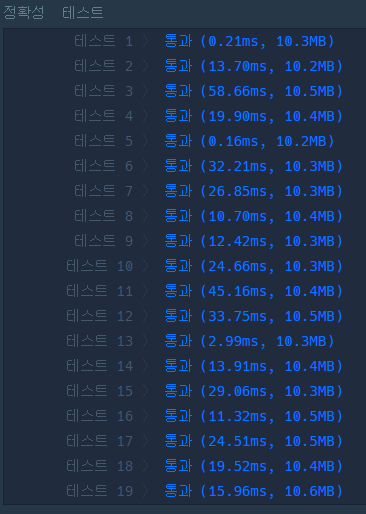

In [ ]:
def solution(book_time):
    time_table = [0 for _ in range(60 * 24)]
    for start, end in book_time:
        start_minutes = 60 * int(start[:2]) + int(start[3:])
        end_minutes = 60 * int(end[:2]) + int(end[3:]) + 10

        if end_minutes > 60 * 24 - 1:
            end_minutes = 60 * 24 - 1

        for i in range(start_minutes, end_minutes):
            time_table[i] += 1
    return max(time_table)

In [25]:
book_time = [["15:00", "17:00"], ["16:40", "18:20"], ["14:20", "15:20"], ["14:10", "19:20"], ["18:20", "21:20"]]
solution(book_time=book_time)

3

### [전력망을 둘로 나누기](https://school.programmers.co.kr/learn/courses/30/lessons/86971)

In [6]:
def solution(n, wires):
    n += 1
    answer = n
    for idx in range(len(wires)):
        subset = wires[:idx]+wires[idx+1:]
        graph = {k:[] for k in range(n)}
        for v1, v2 in subset:
            graph[v1].append(v2)
            graph[v2].append(v1)
        
        visited = [False] * n
        group_idx = 0
        for i in range(1,n):
            if not visited[i]:
                group_idx += 1
                visited[i] = group_idx
                nodes = graph[i]
                while nodes:
                    node = nodes.pop()
                    if not visited[node]:
                        visited[node] = group_idx
                        nodes += graph[node]
                
        gap = abs(visited.count(1) - visited.count(2))
        answer = gap if gap < answer else answer
    return answer

In [7]:
n = 4
wires = [[1, 2], [3, 4], [2, 4]]
solution(n, wires)

[False, 1, 1, 2, 2]


In [52]:
def dfs(start, graph, visited):
    stack = [start]
    count = 0
    while stack:
        node = stack.pop()
        if not visited[node]:
            visited[node] = True
            count += 1
            for neighbor in graph[node]:
                if not visited[neighbor]:
                    stack.append(neighbor)
    return count

def solution(n, wires):

    answer = n  # 최대 차이는 n-1일 수 있으므로, n으로 초기화

    # 그래프 구성
    for i in range(len(wires)):
        graph = {k: [] for k in range(1, n+1)}
        for j in range(len(wires)):
            if i != j:
                v1, v2 = wires[j]
                graph[v1].append(v2)
                graph[v2].append(v1)

        # 첫 번째 전선을 끊었을 때의 두 네트워크 크기 계산
        visited = [False] * (n + 1)
        # 끊어진 전선의 첫 번째 노드부터 시작
        count1 = dfs(wires[i][0], graph, visited)
        # 끊어진 전선의 두 번째 노드부터 시작
        count2 = dfs(wires[i][1], graph, visited)
        
        # 두 그룹의 차이 계산
        current_diff = abs(count1 - count2)
        if current_diff < answer:
            answer = current_diff

    return answer

In [1]:
def solution(n, wires):
    ans = n
    for sub in (wires[i+1:] + wires[:i] for i in range(len(wires))):
        s = set(sub[0])
        [s.update(v) for _ in sub for v in sub if set(v) & s]
        ans = min(ans, abs(2 * len(s) - n))
    return ans

In [3]:
n = 4
wires = [[1, 2], [3, 4], [2, 4]]
solution(n, wires)

{3, 4}
{2, 4}
{1, 2}


0

In [4]:
n = 8
wires = [[1,2],[1,2],[1,3],[1,4],[4,5],[5,6],[6,7],[6,8]]
solution(n, wires)

{1, 2}
{1, 3}
{1, 4}
{4, 5}
{5, 6}
{6, 7}
{8, 6}
{1, 2}


0